In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Part 1: Showing the Dataset

In [2]:
df = pd.read_csv('zomato_res.csv')
df

,Additional_outlet_count,Call,Cost_for_two,Cuisines,Delivery_Time_min_order,Features,Home_Delivery,Operational_hours,Rating_votes,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu
0,1 more outlet in Mumbai,True,"₹1,500","Finger Food, Continental, European, Italian",NaN,"Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),4.9 132...,Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True
1,1 more outlet in Mumbai,True,₹800,Pizza,NaN,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),4.6 597...,Malad West,Joey's Pizza,Quick Bites,True
2,NaN,True,"₹2,500",Seafood,NaN,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",4.5 143...,"Linking Road, Bandra West",Bastian,"Casual Dining,Bar",True
3,NaN,True,"₹1,800","Finger Food, Continental",NaN,"Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),4.9 327...,Lower Parel,Tamasha,"Lounge,Bar",True
4,2 more outlets in Mumbai,True,₹450,"North Indian, Street Food, Fast Food, Chinese",45 min ...,NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",4.1 142...,Vashi,Bhagat Tarachand,Casual Dining,True
5,NaN,True,"₹1,600","Modern Indian, European, Pizza, Grill",NaN,"Best of Mumbai, Food Hygiene Rated Restaurants...",False,1pm – 1am (Mon-Sun),4.8 198...,"Linking Road, Bandra West",JLWA,"Casual Dining,Bar",True
6,NaN,True,₹800,"American, Asian, Street Food, Indian, Lucknowi...",30 min ...,NaN,True,12noon – 1am (Mon-Sun),4.4 142...,Flea Bazaar Café,Flea Bazaar Café,Café,True
7,3 more outlets in Mumbai,True,"₹1,200",Modern Indian,45 min ...,Best of Mumbai,True,12noon – 1:30am (Mon-Sun),4.7 264...,"First International Financial Centre, Bandra K...",HITCHKI,"Casual Dining,Bar",True
8,NaN,True,"₹2,800","Asian, Cantonese, Chinese, Tea, Yum Cha",NaN,Best of Mumbai,False,12noon – 1am (Mon-Sun),4.7 475...,Bandra Kurla Complex,Yauatcha,Fine Dining,True
9,NaN,True,"₹1,200",Asian,NaN,Newly Opened,False,12noon – 1am (Mon-Sun),NEW,"High Street Phoenix, Lower Parel",Foo,Casual Dining,True


# Part 2: Introduction

__Column Legends:__
- __Additional_outlet_count__: The amount of additional outlet other than the main, if there is/are
- __Call__: the condition if the restaurant has a phone number to be contacted or not
- __Cost_for_two__: the average cost estimation for two people
- __Cuisines__: the type of Cuisines that is served by the restaurant
- __Delivery_Time_min_orders__: the duration of delivery time per order
- __Features__: the features that is/are provided by the restaurant
- __Home_Delivery__: the condition whether the restaurant could provide home delivery service or not
- __Operational_hours__: The operating hours and days of the restaurant
- __Rating_votes__: The average rating received by the restaurant
- __Restaurant_Name__: The name of the restaurant
- __Restaurant_Type__: The classification of the restaurant in the term of "way of eating"
- __View_Menu__: The condition if the restaurant provides the menu or not

In [12]:
##### Amount of Row and Column #####
print(f'rows = {df.shape[0]} | columns = {df.shape[1]}')

rows = 7285 | columns = 13


# Part 3: Data Analysis

__A. Top 20 Restaurant with Most Outlet__

In [105]:
books

Cinnamon N Nutmeg                                       2
The Liquor Factory                                      2
Lucky Dragon                                            2
Prayag Thali                                            2
Imperial China - Hilton Mumbai International Airport    2
Dosti Yaari                                             2
Lung Fung                                               2
Radha Krishna                                           2
Brown Bell Cafe                                         2
Pranaam Fine Dine & Bar                                 2
Kabila                                                  2
Peshawri - ITC Maratha                                  2
Crave                                                   2
Dilli Deli                                              2
Great Punjab                                            2
China Hut                                               2
Second Wife                                             2
Cheesy Bites  

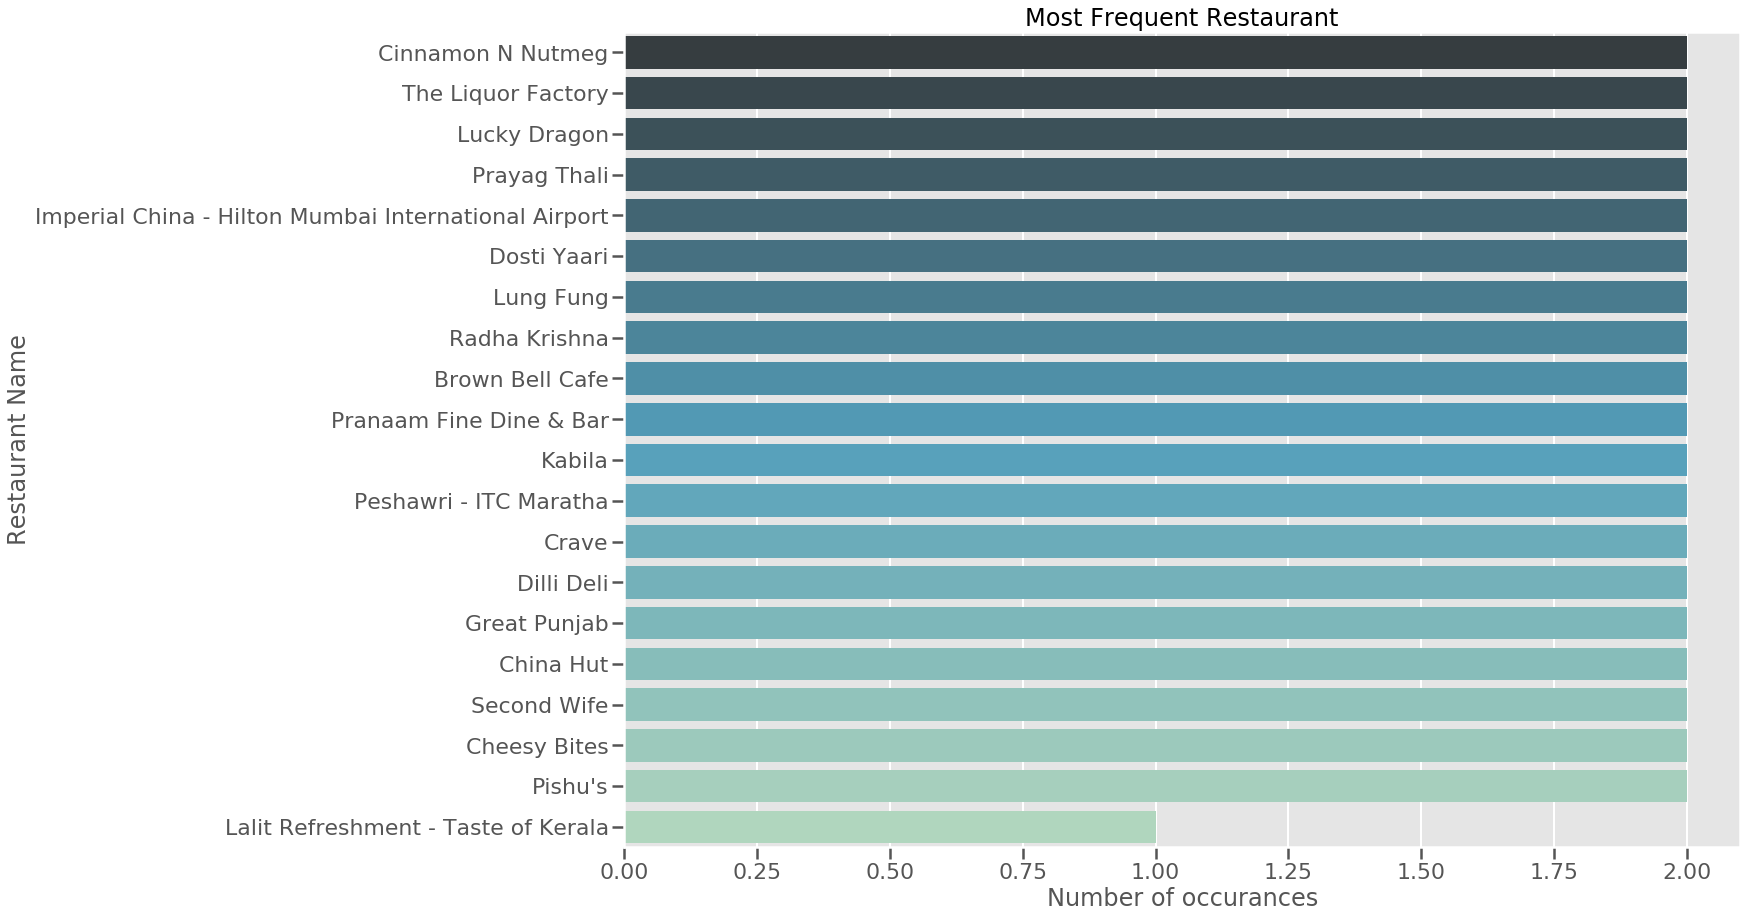

In [104]:
sb.set_context('poster')
plt.figure(figsize=(20,15))
books = df['Restaurant_Name'].value_counts()[:20]
sb.barplot(x = books, y = books.index, palette='GnBu_d')
plt.title("Most Frequent Restaurant")
plt.xlabel("Number of occurances")
plt.ylabel("Restaurant Name")
plt.show()

__B. Price (for Two People) Distribution__

In [13]:
#### Data Cleaning for 'price for two people' ####

df = df.dropna(subset = ['Cost_for_two'])# --> dropping the incomplete data
df['Cost_for_two'] = df['Cost_for_two'].str.replace('₹', '')# --> Removing Rupee Symbol
df['Cost_for_two'] = df['Cost_for_two'].str.replace(',', '') #--> Removing koma
df['Cost_for_two'] = df['Cost_for_two'].astype('int64') #--> changing data type from object into int64
df.dtypes

Additional_outlet_count    object
Call                         bool
Cost_for_two                int64
Cuisines                   object
Delivery_Time_min_order    object
Features                   object
Home_Delivery                bool
Operational_hours          object
Rating_votes               object
Restaurant_Location        object
Restaurant_Name            object
Restaurant_Type            object
View_Menu                    bool
dtype: object

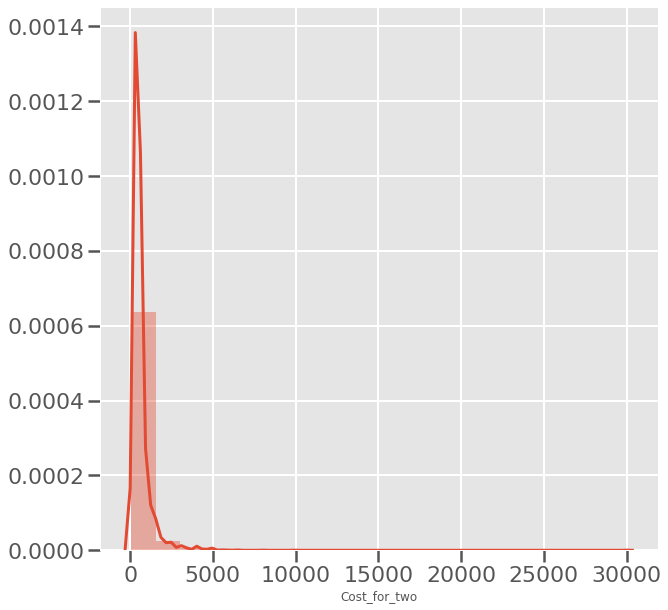

In [209]:
plt.figure(figsize=(10,10))
sb.distplot(df['Cost_for_two'], bins=20)
plt.show()

__C. Top 10 Restaurant with Highest Meal Cost__

In [192]:
Classy = df['Cost_for_two'] > 6000
Regular = df['Cost_for_two'] <= 6000
df[Classy].count()

Additional_outlet_count    0
Call                       5
Cost_for_two               5
Cuisines                   5
Delivery_Time_min_order    0
Features                   3
Home_Delivery              5
Operational_hours          5
Rating_votes               5
Restaurant_Location        5
Restaurant_Name            5
Restaurant_Type            5
View_Menu                  5
dtype: int64

In [102]:
most_rated.index

Index(['Masala Library', 'XXO - The St. Regis Mumbai',
       'Dum Pukht - ITC Maratha', 'Romano's - JW Marriott Mumbai Sahar',
       'Diwine - Sahara Star', 'Peshawri - ITC Maratha',
       'Dakshin Coastal - ITC Maratha', 'Vista - Taj Lands End',
       'Bombay High - ITC Maratha', 'Souk - The Taj Mahal Palace',
       'Celini - Grand Hyatt', 'Yuuka - The St. Regis Mumbai',
       'Wasabi By Morimoto - The Taj Mahal Palace',
       'Ocean - The Private Dining Room - Sahara Star'],
      dtype='object', name='Restaurant_Name')

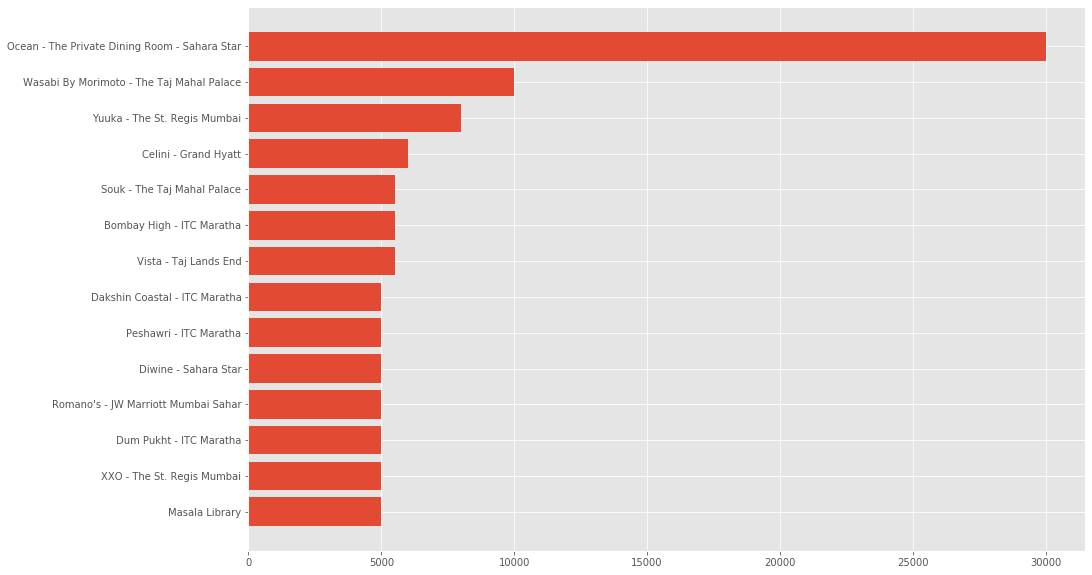

In [100]:
most_rated = df.sort_values('Cost_for_two', ascending = False).head(14).set_index('Restaurant_Name').sort_values(by=['Cost_for_two'], ascending=True)
plt.figure(figsize=(15,10))
plt.barh(most_rated.index, most_rated['Cost_for_two'], linewidth=10)
plt.show()

In [114]:
from collections import Counter

In [78]:
cuis = []
for i in a:
    for b in i:
        cuis.append(b)

In [76]:
a = []
for c in df.Cuisines:
    a.append(c.split(","))

In [87]:
cuisines = []
for i in cuis :
    cuisines.append(i.lstrip())

In [127]:
df_cuisines = pd.DataFrame.from_dict(Counter(cuisines),orient='index').reset_index()

In [131]:
df_cuisines.sort_values(0)

,index,0
54,Pakistani,1
68,Shanghai,1
69,Sichuan,1
79,International,1
84,Hot Pot,1
86,Modern Australian,1
88,Swiss,1
61,Steak,1
90,Bubble Tea,1
99,Falafel,1
